# KASSIM Al-Mouyasser DUT STID S4

## 2. L'analyse en composantes principales sur le niveau de diplôme

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

### 2. 1. L'importation du jeu de données

In [ ]:
data_communes = pd.read_csv("C:/Users/almou/OneDrive/Documents/Inégalités France/Inegalites2018_IDFCommunes.csv", sep=';')

In [ ]:
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,Part Pop 15 ans ou plus Enseignement sup,Taux d'emploi 15-64 ans,Taux de chômage 15-64 ans,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration
0,75101,11,75,"48,86263049","2,336293447",Paris 1er Arrondissement,38020,0.099,0.031,0.075,...,0.681,0.704,0.106,0.000,0.093,0.511,0.198,0.153,0.044,0.190
1,75102,11,75,"48,86790338","2,344107167",Paris 2e Arrondissement,35710,0.084,0.023,0.064,...,0.717,0.768,0.098,0.000,0.079,0.538,0.198,0.134,0.050,0.184
2,75103,11,75,"48,86305413","2,359361059",Paris 3e Arrondissement,36450,0.085,0.028,0.047,...,0.721,0.741,0.100,0.000,0.081,0.526,0.220,0.139,0.035,0.201
3,75104,11,75,"48,85422828","2,357361938",Paris 4e Arrondissement,34940,0.075,0.030,0.062,...,0.705,0.706,0.111,0.001,0.077,0.509,0.221,0.156,0.037,0.192
4,75105,11,75,"48,84450866","2,349859386",Paris 5e Arrondissement,37480,0.074,0.025,0.053,...,0.743,0.650,0.091,0.000,0.064,0.574,0.196,0.130,0.035,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95676,11,95,"49,08589993","1,730396299",Villers-en-Arthies,27880,0.089,0.077,0.283,...,0.343,0.753,0.091,0.000,0.077,0.128,0.308,0.359,0.128,0.022
1267,95678,11,95,"49,07028882","2,239508719",Villiers-Adam,31760,0.153,0.053,0.218,...,0.422,0.709,0.085,0.000,0.059,0.329,0.282,0.189,0.141,0.046
1268,95680,11,95,"49,00844942","2,40385604",Villiers-le-Bel,13040,0.344,0.068,0.204,...,0.191,0.555,0.207,0.000,0.050,0.068,0.219,0.384,0.279,0.360
1269,95682,11,95,"49,07430887","2,3868896",Villiers-le-Sec,26220,0.113,0.083,0.211,...,0.414,0.810,0.075,0.000,0.042,0.208,0.250,0.375,0.125,0.122


In [ ]:
#Copier le DataSet
communes_socioeco = data_communes.copy()

#Accéder aux colonnes du DataSet
communes_socioeco.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration'],
      dtype='object')

### 2.2. L'ACP sur le niveau d'instruction

In [ ]:
#Supprimer les colonnes qui ne sont pas nécessaires dans mon étude

communes_education = data_communes[['Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup']]
communes_education['Code géographique'] = data_communes['Code géographique'].astype(str)
communes_education = communes_education.set_index('Code géographique')
communes_education

C:\Users\almou\AppData\Local\Temp/ipykernel_14804/2589180474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  communes_education['Code géographique'] = data_communes['Code géographique'].astype(str)


,Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",Part Pop 15 ans ou plus Enseignement sup
Code géographique,,,,,
75101,0.099,0.031,0.075,0.114,0.681
75102,0.084,0.023,0.064,0.112,0.717
75103,0.085,0.028,0.047,0.118,0.721
75104,0.075,0.030,0.062,0.128,0.705
75105,0.074,0.025,0.053,0.104,0.743
...,...,...,...,...,...
95676,0.089,0.077,0.283,0.209,0.343
95678,0.153,0.053,0.218,0.154,0.422
95680,0.344,0.068,0.204,0.193,0.191


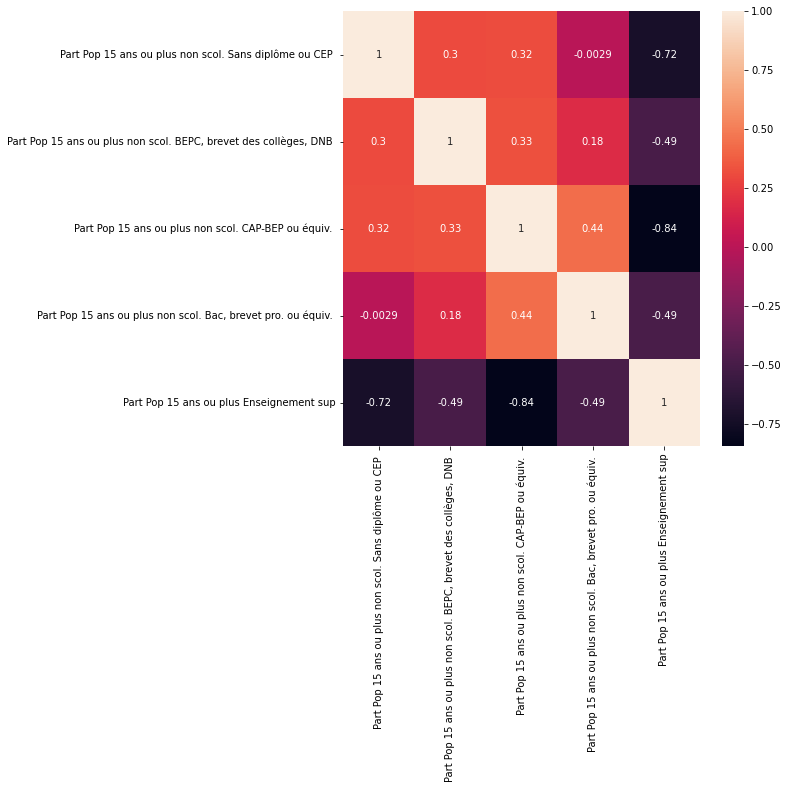

In [ ]:
#Matrice de corrélations
corr_education = communes_education.corr(method='pearson')

plt.figure(figsize=(8,8))
sns.heatmap(corr_education, annot=True)
plt.show()

In [ ]:
#Résumer les données
communes_education.describe()

,Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",Part Pop 15 ans ou plus Enseignement sup
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.172394,0.052496,0.237803,0.184611,0.352704
std,0.063444,0.014261,0.066017,0.028493,0.122409
min,0.038000,0.010000,0.037000,0.084000,0.093000
25%,0.128000,0.043000,0.198000,0.168000,0.264000
50%,0.164000,0.052000,0.242000,0.185000,0.334000
75%,0.207000,0.060000,0.285000,0.201000,0.417000
max,0.495000,0.135000,0.414000,0.282000,0.743000


In [ ]:
#Dimensions du Dataset (nombre d'individus et nombre de variables)
n = communes_education.shape[0]
p = communes_education.shape[1]


### 2.3. La pratique de la normalisation

In [ ]:
s_scaler = StandardScaler()
scaled_education = s_scaler.fit_transform(communes_education)
scaled_education = pd.DataFrame(scaled_education)
scaled_education.columns = ['Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup']
scaled_education.set_index(data_communes['Code géographique'])

,Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",Part Pop 15 ans ou plus Enseignement sup
Code géographique,,,,,
75101,-1.157293,-1.507939,-2.467022,-2.479178,2.683008
75102,-1.393816,-2.069145,-2.633710,-2.549398,2.977219
75103,-1.378048,-1.718391,-2.891319,-2.338737,3.009909
75104,-1.535730,-1.578090,-2.664017,-1.987635,2.879148
75105,-1.551498,-1.928844,-2.800398,-2.830280,3.189705
...,...,...,...,...,...
95676,-1.314975,1.718998,0.684898,0.856291,-0.079308
95678,-0.305811,0.035379,-0.300077,-1.074770,0.566322
95680,2.705913,1.087641,-0.512225,0.294528,-1.321532


In [ ]:
#Vériifier si les données sont bien centrées-réduites
print(np.mean(scaled_education,axis=0))
print(np.std(scaled_education,axis=0,ddof=0))

Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP               -1.834030e-16
Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB    -3.510392e-16
Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.                  2.401261e-16
Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.        -6.007957e-16
Part Pop 15 ans ou plus Enseignement sup                            -2.572468e-17
dtype: float64
Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP                1.0
Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB     1.0
Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.                  1.0
Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.         1.0
Part Pop 15 ans ou plus Enseignement sup                             1.0
dtype: float64


### 2.4. Calcul des valeurs propres et des composants

In [ ]:
#Coordonnées des communes dans les nouveaux axes
pca = PCA()
coords_education = pca.fit_transform(scaled_education)
coords_education

array([[ 4.64628614e+00,  1.19045742e+00, -8.51995282e-02,
        -1.78429685e-01,  3.82718422e-04],
       [ 5.22389652e+00,  1.00282443e+00, -4.32525942e-01,
        -2.04815314e-01,  4.24575876e-04],
       [ 5.17210590e+00,  9.87155252e-01, -6.51136576e-02,
         1.06834047e-01,  6.84778877e-03],
       ...,
       [-2.08775576e+00,  1.85553373e+00, -6.81290997e-02,
         1.67156457e+00, -2.90710172e-04],
       [ 1.55893744e-01,  4.51332145e-02,  2.41647985e+00,
        -1.80698567e-01, -6.18222017e-03],
       [ 3.04249448e-01, -5.90709387e-01,  5.11746848e-01,
         1.26745399e+00,  1.34582583e-04]])

In [ ]:
coords_education[:,0:2]

array([[ 4.64628614,  1.19045742],
       [ 5.22389652,  1.00282443],
       [ 5.1721059 ,  0.98715525],
       ...,
       [-2.08775576,  1.85553373],
       [ 0.15589374,  0.04513321],
       [ 0.30424945, -0.59070939]])

In [ ]:
#Déterminer les valeurs propres
eigenvalues = (n-1)/n*pca.explained_variance_
print("Valeurs propres de l'ACP = ", eigenvalues)

Valeurs propres de l'ACP =  [2.75846417e+00 1.05159741e+00 7.29552541e-01 4.60368596e-01
 1.72763963e-05]


In [ ]:
#Le taux d'inertie des 13 axes
print("Taux d'inertie des 5 axes = ", pca.explained_variance_ratio_)

Taux d'inertie des 5 axes =  [5.51692834e-01 2.10319483e-01 1.45910508e-01 9.20737193e-02
 3.45527925e-06]


Text(0.5, 1.0, 'Les valeurs propres en fonction des facteurs')

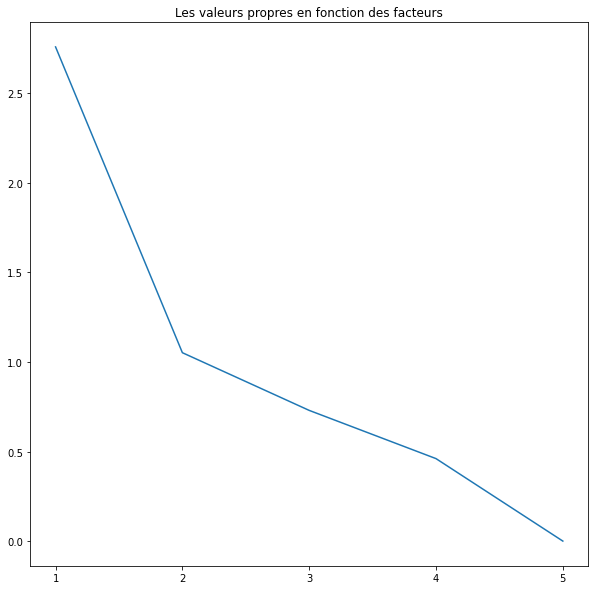

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xticks(np.arange(p+1))
axes.plot(range(1,p+1), eigenvalues)
plt.title("Les valeurs propres en fonction des facteurs")

Text(0.5, 1.0, 'Cumul de la variance expliquée en fonction des facteurs')

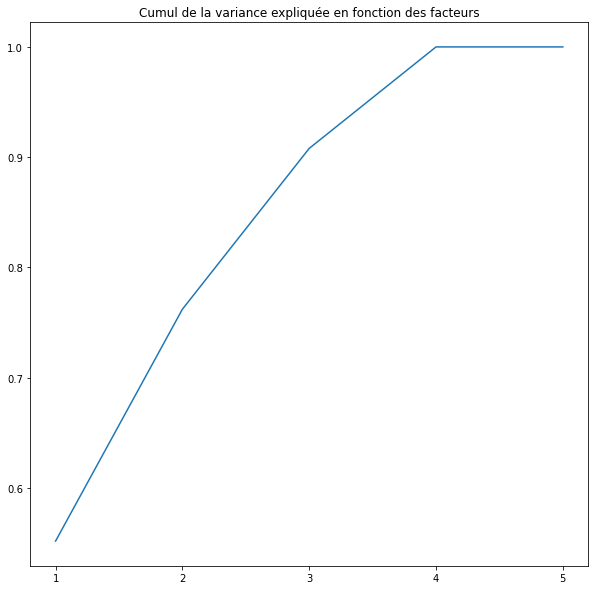

In [ ]:
#Courbe de la variance cumulée en fonction du nombre des facteurs
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xticks(np.arange(p+1))
axes.plot(range(1,p+1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumul de la variance expliquée en fonction des facteurs")

En prenant les deux grandes valeurs propres de la Table "Education", nous avons donc **75% de l'inertie totale qui est retenue**

### 2.5. La projection des individus sur les nouveaux axes par la réduction des dimensions (n = 5)

Text(0, 0.5, "Axe 2 : 21,03 % de l'inertie totale")

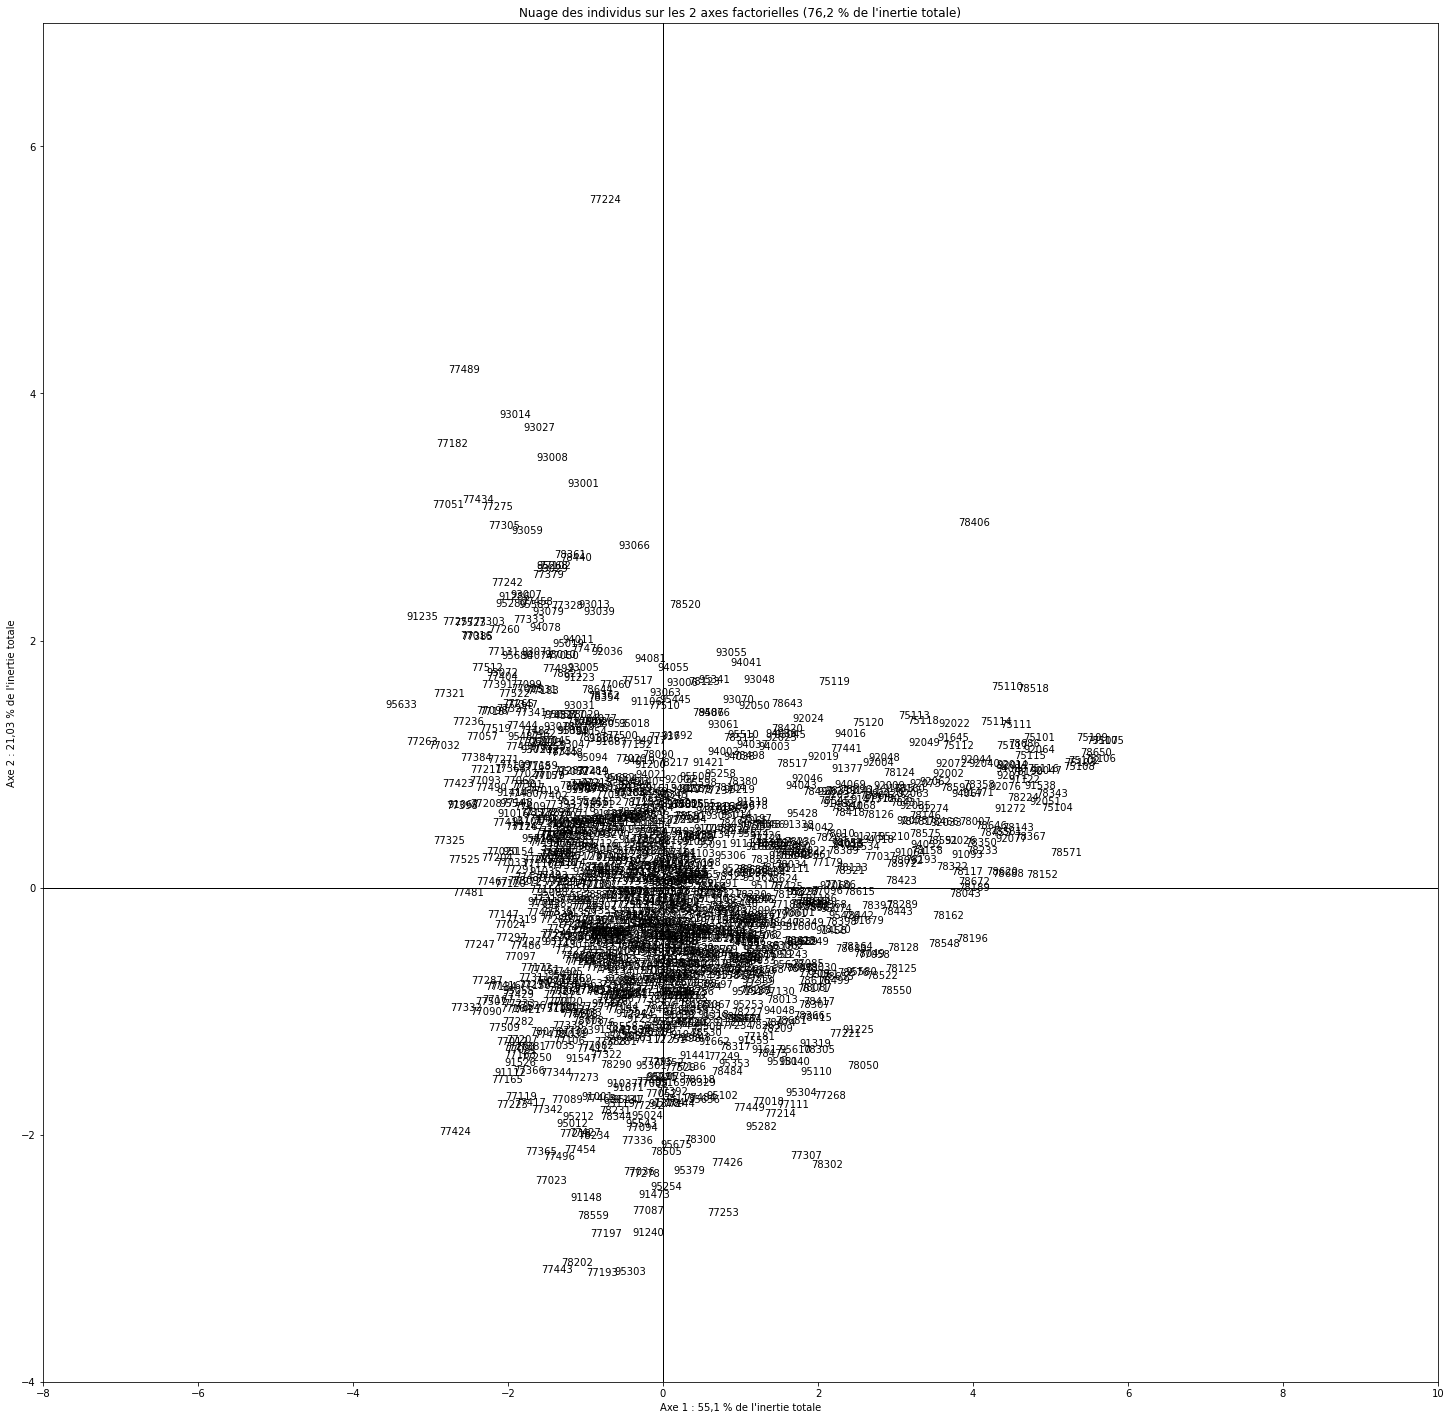

In [ ]:
#Représentation des individus
fig, axes = plt.subplots(figsize=(25,25))
axes.set_xlim(-8,10)
axes.set_ylim(-4,7)
plt.plot([-8,10],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,10],color='black',linewidth=1)

for i in range(n):
    plt.annotate(communes_education.index[i],(coords_education[i,0],coords_education[i,1]))
plt.title("Nuage des individus sur les 2 axes factorielles (76,2 % de l'inertie totale)")
plt.xlabel("Axe 1 : 55,1 % de l'inertie totale")
plt.ylabel("Axe 2 : 21,03 % de l'inertie totale")


In [ ]:
#Méthode des bâtons brisés
b_i = 1/np.arange(p,0,-1)
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
pd.DataFrame({'Val propre':eigenvalues,'Seuils':cumul_b_i})

,Val propre,Seuils
0,2.758464,2.283333
1,1.051597,1.283333
2,0.729553,0.783333
3,0.460369,0.450000
4,0.000017,0.200000


Donc je dois retenir que 2 axes.

In [ ]:
#Qualité de représentation des individus
total_dist = np.sum(scaled_education**2,axis=1)
cos2_education = coords_education**2
for j in range(p):
    cos2_education[:,j]=cos2_education[:,j]/total_dist
    
    
pd.DataFrame({'Code géographique':communes_education.index,'COS2_1':cos2_education[:,0],'COS2_2':cos2_education[:,1]})

,Code géographique,COS2_1,COS2_2
0,75101,0.936805,0.061499
1,75102,0.956714,0.035257
2,75103,0.964306,0.035128
3,75104,0.983690,0.015898
4,75105,0.953658,0.042194
...,...,...,...
1266,95676,0.100191,0.255254
1267,95678,0.538737,0.244620
1268,95680,0.411181,0.324797
1269,95682,0.004120,0.000345


In [ ]:
#Vérifier que l'inertie totale des variables initiales est bien récupérée
print(np.sum(cos2_education,axis=1))

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
#Contribution des individus
ctr = coords_education**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigenvalues[j])
    
pd.DataFrame({'Code géographique':communes_education.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})


,Code géographique,CTR_1,CTR_2
0,75101,0.006157,0.001060
1,75102,0.007784,0.000752
2,75103,0.007630,0.000729
3,75104,0.006786,0.000288
4,75105,0.008746,0.001015
...,...,...,...
1266,95676,0.000168,0.001125
1267,95678,0.000255,0.000304
1268,95680,0.001243,0.002576
1269,95682,0.000007,0.000002


In [ ]:
#Cercle de corrélations des variables
sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar_education = np.zeros((p,p))
for i in range(p):
    corvar_education[:,i]=pca.components_[i,:]*sqrt_eigenvalues[i]
    
pd.DataFrame({'Niveau de formation':communes_education.columns,'COR_1':corvar_education[:,0],'COR_2':corvar_education[:,1]})

,Niveau de formation,COR_1,COR_2
0,Part Pop 15 ans ou plus non scol. Sans diplôme...,-0.658210,0.630007
1,"Part Pop 15 ans ou plus non scol. BEPC, brevet...",-0.598004,0.210193
2,Part Pop 15 ans ou plus non scol. CAP-BEP ou é...,-0.836735,-0.229024
3,"Part Pop 15 ans ou plus non scol. Bac, brevet ...",-0.539882,-0.745065
4,Part Pop 15 ans ou plus Enseignement sup,0.987936,-0.054160


Text(0.5, 1.0, "Cercle des corrélations : 76,2% de l'inertie totale")

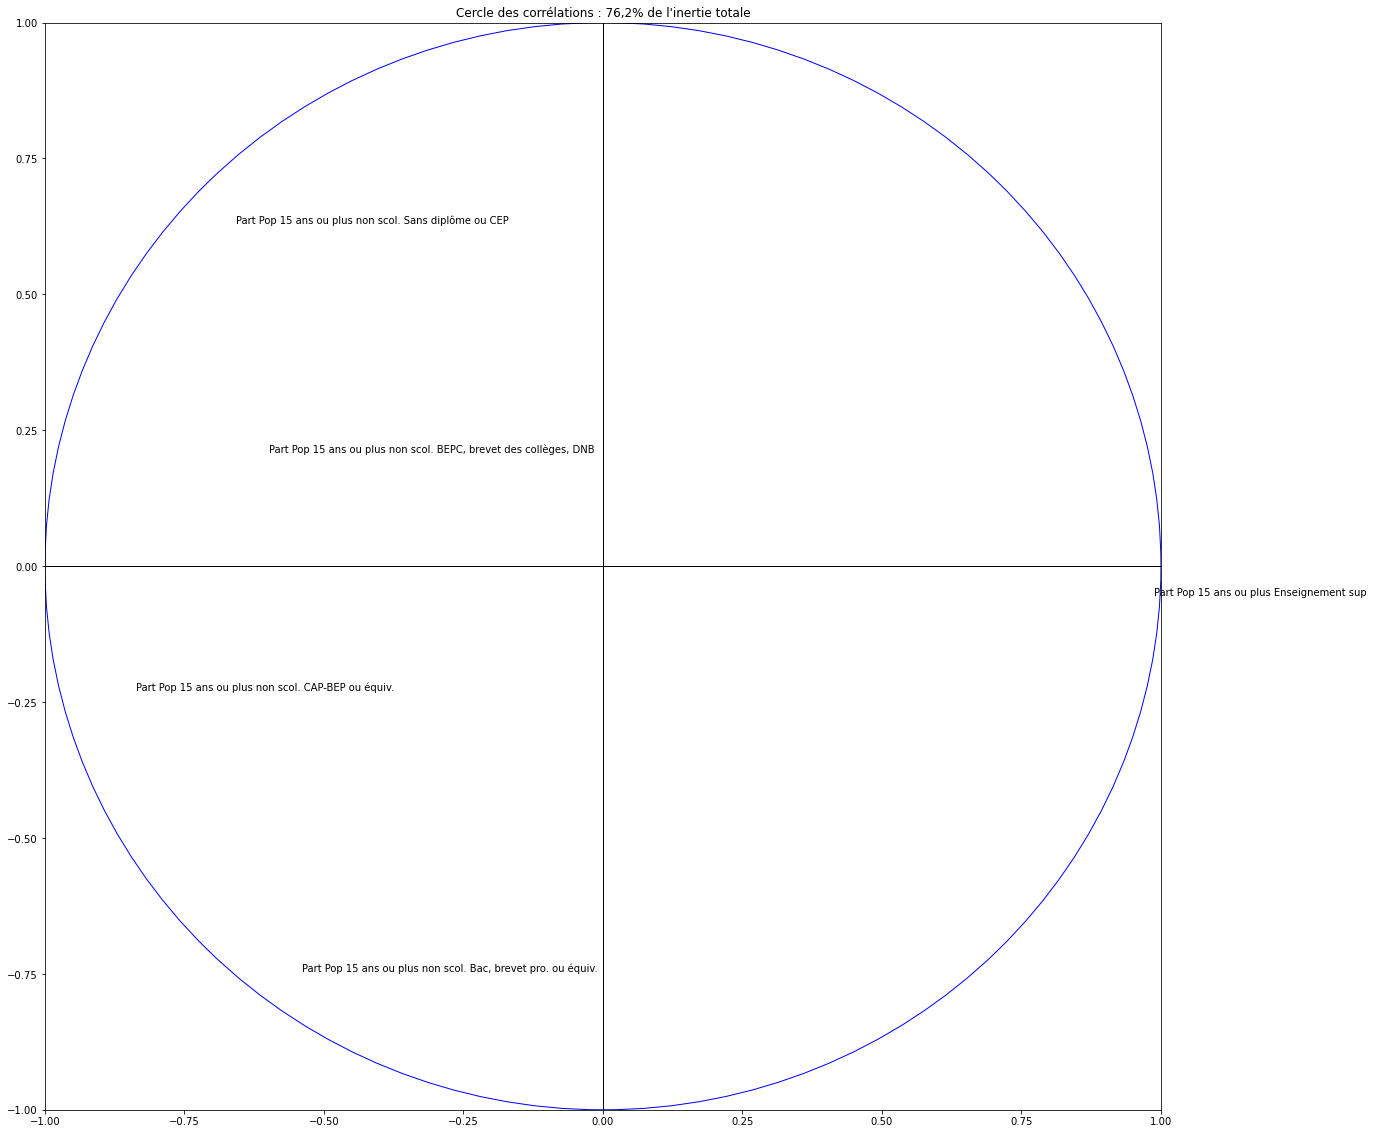

In [ ]:
#Tracer le cercle des corrélations des variables d'instruction
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(communes_education.columns[j],(corvar_education[j,0],corvar_education[j,1]))
    
plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
plt.title("Cercle des corrélations : 76,2% de l'inertie totale")


Dans ce graphique, on constate que la présence des diplômes d'enseignement est correlée négativement avec les sans diplômés et aussi les diplômés d'un CAP-BEP. 
D'ailleurs la présence des diplômés d'enseignement supérieur et les diplômés d'un CAP-BEP sont bien corrélées à l'axe 1.
Dans l'axe 2, la part des diplômés du bac et les sans diplômés sont bien correlées dans cette dernière.
Mais la part des titulaires n'est pas très bien correlée dans l'axe 2, due à la perte de l'inertie de 24%.

In [ ]:
#Qualité de représentation des variables
cos2_varedu = corvar_education**2
pd.DataFrame({'Niveau de formation':communes_education.columns,'COS2_1':cos2_varedu[:,0],'COS2_2':cos2_varedu[:,1]})

,Niveau de formation,COS2_1,COS2_2
0,Part Pop 15 ans ou plus non scol. Sans diplôme...,0.433241,0.396909
1,"Part Pop 15 ans ou plus non scol. BEPC, brevet...",0.357608,0.044181
2,Part Pop 15 ans ou plus non scol. CAP-BEP ou é...,0.700126,0.052452
3,"Part Pop 15 ans ou plus non scol. Bac, brevet ...",0.291473,0.555123
4,Part Pop 15 ans ou plus Enseignement sup,0.976017,0.002933


Les variables les plus représentatives, dans les 2 composants, sont la part des CAP-BEP, sans diplômés, bacheliers et la part des diplômés d'enseignement supérieur.

In [ ]:
#Contribution des variables
ctr_varedu=cos2_varedu
for i in range(p):
    ctr_varedu[:,i]=ctr_varedu[:,i]/eigenvalues[i]
pd.DataFrame({'Indicateurs sociaux':communes_education.columns,'CTR_1':ctr_varedu[:,0],'CTR_2':ctr_varedu[:,1]})

,Indicateurs sociaux,CTR_1,CTR_2
0,Part Pop 15 ans ou plus non scol. Sans diplôme...,0.157059,0.377434
1,"Part Pop 15 ans ou plus non scol. BEPC, brevet...",0.129640,0.042013
2,Part Pop 15 ans ou plus non scol. CAP-BEP ou é...,0.253810,0.049878
3,"Part Pop 15 ans ou plus non scol. Bac, brevet ...",0.105665,0.527885
4,Part Pop 15 ans ou plus Enseignement sup,0.353826,0.002789


Dans l'axe 1, les variables qui contribuent le plus sont : **la part des diplômés d'enseignement supérieur et les tituaires d'un CAP-BEP**.
Dans l'axe 2, **la part des sans diplômés contribuent à 37,7% de l'inertie de la 2ème composante** tandis que la part des bacheliers non scolarisés contribuent à **52,7% de l'inertie de l'axe 2**.

## 3. La méthode de classification

### 3.1. Les librairies nécessaires

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

### 3.2. La classification hiérarchique ascendante selon le niveau d'éducation de la population d'Ile-de-France

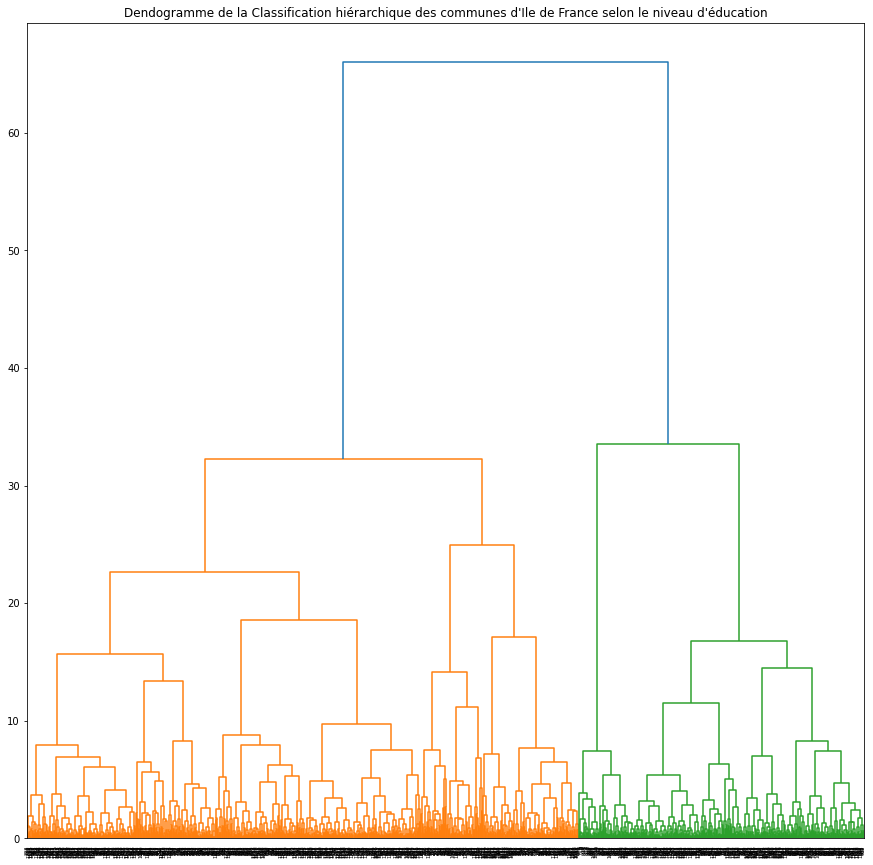

In [ ]:
#Mise en place de la classification hiérarchique ascendante par 2 catégories en conservant 76% de l'inertie totale via l'ACP
Z = sch.linkage(communes_education.iloc[:,0:5],method='ward',metric='euclidean')

#Afficher le dendrogramme
plt.figure(figsize=(15,15))
plt.title("Dendogramme de la Classification hiérarchique des communes d'Ile de France selon le niveau d'éducation")
dendrogram = sch.dendrogram(sch.linkage(coords_education, method  = "ward"))
plt.show()

### 3.3. Nuage des individus selon le niveau d'éducation et leurs groupes respectifs à travers les axes de l'ACP

Text(0.5, 1.0, 'K-Means par la méthode du PCA')

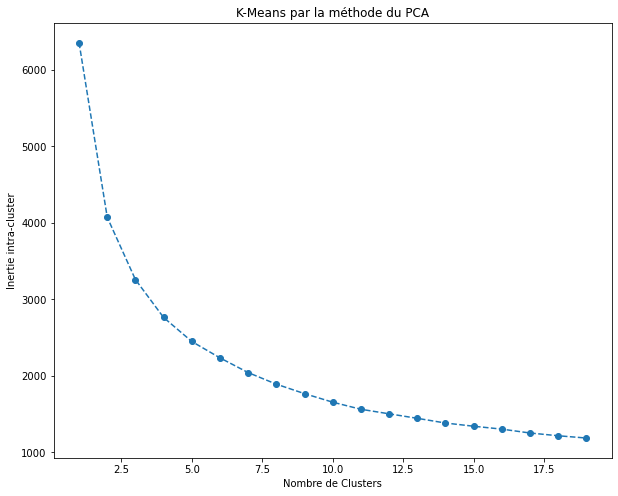

In [ ]:
#Courbe de l'inertie intra-cluster pour le K-Means
inertie_intra = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans_pca.fit(coords_education)
    inertie_intra.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),inertie_intra, marker='o',linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('K-Means par la méthode du PCA')

Nous devons donc fixé 2 clusters.

In [ ]:
#Nuage des individus avec les 2 strates dans les nouveaux axes de l'ACP
kmeans_pca_edu = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_pca_edu.fit(coords_education)

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Créer les nouvelles colonnes dans le DataFrame
edu_pca_kmeans = pd.concat([communes_education.reset_index(drop=True),pd.DataFrame(coords_education[:,0:2])], axis=1)
edu_pca_kmeans.columns.values[-2:]=['Composant 1','Composant 2']
edu_pca_kmeans['Numéro de cluster']=kmeans_pca_edu.labels_
edu_pca_kmeans

,Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",Part Pop 15 ans ou plus Enseignement sup,Composant 1,Composant 2,Numéro de cluster
0,0.099,0.031,0.075,0.114,0.681,4.646286,1.190457,0
1,0.084,0.023,0.064,0.112,0.717,5.223897,1.002824,0
2,0.085,0.028,0.047,0.118,0.721,5.172106,0.987155,0
3,0.075,0.030,0.062,0.128,0.705,4.877656,0.620086,0
4,0.074,0.025,0.053,0.104,0.743,5.537544,1.164791,0
...,...,...,...,...,...,...,...,...
1266,0.089,0.077,0.283,0.209,0.343,-0.768374,-1.226436,1
1267,0.153,0.053,0.218,0.154,0.422,0.945867,0.637363,0
1268,0.344,0.068,0.204,0.193,0.191,-2.087756,1.855534,1
1269,0.113,0.083,0.211,0.180,0.414,0.155894,0.045133,1


In [ ]:
edu_pca_kmeans['Caractéristique de la commune']=edu_pca_kmeans['Numéro de cluster'].map({0:'Bien instruit (Enseignement sup.)',1:'Instruit (Sans diplôme, CAP-BEP)'})
edu_pca_kmeans.set_index(data_communes['Code géographique'],inplace=True)

C:\Users\almou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


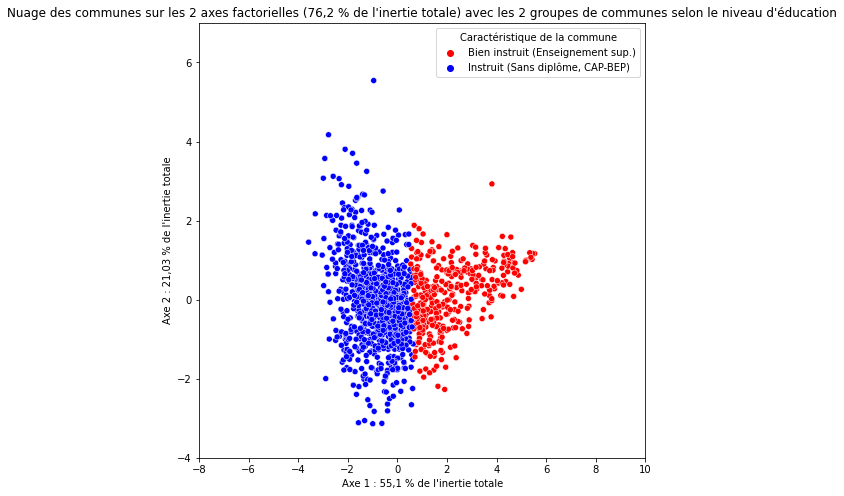

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-8,10)
axes.set_ylim(-4,7)
sns.scatterplot(coords_education[:,0],coords_education[:,1], hue = edu_pca_kmeans['Caractéristique de la commune'], palette = ['r','b'])
plt.title("Nuage des communes sur les 2 axes factorielles (76,2 % de l'inertie totale) avec les 2 groupes de communes selon le niveau d'éducation")
plt.xlabel("Axe 1 : 55,1 % de l'inertie totale")
plt.ylabel("Axe 2 : 21,03 % de l'inertie totale")
plt.show()

In [ ]:
max(coords_education[:,1])

5.542169831463722

In [ ]:
edu_pca_kmeans.to_excel('.../EducationCommunes2018IDF.xlsx')

PermissionError: [Errno 13] Permission denied: 'C:/Users/almou/OneDrive/Documents/Inégalités France/EducationCommunes2018IDF.xlsx'